In [19]:
#A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units.
#A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
#5% significant level
#import the libraries
import pandas as pd
import scipy 
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


In [3]:
cutlet = pd.read_csv("D:\datascience math\Cutlets.csv")
cutlet.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
cutlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
(cutlet.dropna()).head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [6]:
cutlet.mean()

Unit A    7.019091
Unit B    6.964297
dtype: float64

In [7]:
cutlet.std()

Unit A    0.288408
Unit B    0.343401
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


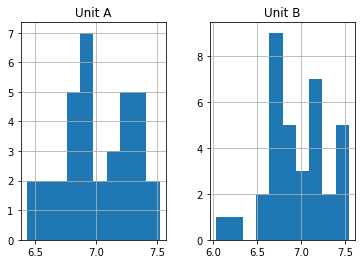

In [9]:
cutlet.hist()
cutlet.info()

{'whiskers': [<matplotlib.lines.Line2D at 0x176054ceac0>,
 'caps': [<matplotlib.lines.Line2D at 0x176054db1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x176054ce760>],
 'medians': [<matplotlib.lines.Line2D at 0x176054db880>],
 'fliers': [<matplotlib.lines.Line2D at 0x176054dbb80>],
 'means': []}

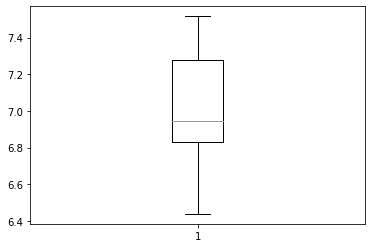

In [24]:
plt.boxplot(cutlet['Unit A'])
#plt.boxplot(cutlet['Unit B'])

In [11]:
#
cutlet.std()/np.sqrt(35)

Unit A    0.048750
Unit B    0.058045
dtype: float64

In [14]:
stats.t.cdf(2.042,df= 34)

0.9755149014555913

In [16]:
scipy.stats.ttest_ind(cutlet['Unit A'],cutlet['Unit B'])


Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

In [ ]:
#2. qstn dataset
#A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
#Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
#Minitab File: LabTAT.mtw


In [25]:
import numpy as np
from scipy import stats
import pandas as pd

In [35]:
labtat = pd.read_csv("D:\datascience math\LabTAT.csv")

In [36]:
labtat.mean()

Laboratory 1    178.361583
Laboratory 2    178.902917
Laboratory 3    199.913250
Laboratory 4    163.682750
dtype: float64

In [37]:
labtat.std()

Laboratory 1    13.173594
Laboratory 2    14.957114
Laboratory 3    16.539033
Laboratory 4    15.085080
dtype: float64

In [38]:
labtat.columns="Laboratory1","Laboratory2","Laboratoy3","Laboratory4"

In [40]:
SupA=stats.shapiro(labtat.Laboratory1)    #Shapiro Test
SupA_pValue=SupA[1]
print("p-value is: "+str(SupA_pValue))


p-value is: 0.5506953597068787


In [44]:
SupB=stats.shapiro(labtat.Laboratory2)    #Shapiro Test
SupB_pValue=SupB[1]
print("p-value is: "+str(SupB_pValue))
SupC=stats.shapiro(labtat.Laboratoy3)    #Shapiro Test
SupC_pValue=SupC[1]
print("p-value is: "+str(SupC_pValue))
SupD=stats.shapiro(labtat.Laboratory4)    #Shapiro Test
SupD_pValue=SupD[1]
print("p-value is: "+str(SupD_pValue))


p-value is: 0.8637524843215942
p-value is: 0.4205053448677063
p-value is: 0.6618951559066772


In [47]:
scipy.stats.levene(labtat.Laboratory1,labtat.Laboratory2)
scipy.stats.levene(labtat.Laboratory2,labtat.Laboratoy3)
scipy.stats.levene(labtat.Laboratoy3,labtat.Laboratory1)
scipy.stats.levene(labtat.Laboratory4,labtat.Laboratory2)
scipy.stats.levene(labtat.Laboratoy3,labtat.Laboratory4)
scipy.stats.levene(labtat.Laboratory1,labtat.Laboratory4)

LeveneResult(statistic=1.5000140718506723, pvalue=0.22188001348277267)

In [50]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

mod=ols('Laboratory1~Laboratory2+Laboratoy3+Laboratory4',data=labtat).fit()
aov_table=sm.stats.anova_lm(mod,type=2)
print(aov_table)

                df        sum_sq     mean_sq         F    PR(>F)
Laboratory2    1.0    332.030416  332.030416  1.940311  0.166299
Laboratoy3     1.0    203.853111  203.853111  1.191271  0.277335
Laboratory4    1.0    265.614707  265.614707  1.552192  0.215323
Residual     116.0  19850.186366  171.122296       NaN       NaN


In [51]:
#3rd question Sales of products in four different regions is tabulated for males and females. 
#Find if male-female buyer rations are similar across regions.

import pandas as pd
import scipy 
import numpy as np
from scipy import stats
from matplotlib import pyplot 


In [83]:
df = pd.read_csv("D:\datascience math\BuyerRatio.csv")

In [93]:
df

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [ ]:
#chi square test

In [95]:
#Chi-Square test 
#count=pd.crosstab(df[""],df[""])
#count


from scipy.stats import chi2_contingency 
  
# defining the table 
data = [[50, 142, 131,70], [435, 1523, 1356,750]] 
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 


p value is 0.6603094907091882
Independent (H0 holds true)


In [1]:
#Chisquares_results=scipy.stats.chi2_contingency(df)
#Chi_pValue=Chisquares_results[1]
#print("p-value is: "+str(Chi_pValue))

In [ ]:
#4.Fantaloons Sales managers commented that % of males versus females walking in to the store differ based on day of
#the week. Analyze the data and determine whether there is evidence at 5 % significance level 
#tosupport this hypothesis.
 
#initab File: Fantaloons.mtw


In [14]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd

In [30]:
fantloon = pd.read_csv("D:\datascience math\Faltoons.csv")

In [4]:
fantloon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Weekdays  400 non-null    object
 1   Weekend   400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [31]:
#fantloon= pd.get_dummies(fantloon)
#fantloon
fantloon['Weekdays']=fantloon['Weekdays'].map({'Male':0,'Female':1})
fantloon['Weekend']=fantloon['Weekend'].map({'Male':0,'Female':1})
fantloon.head(2)

,Weekdays,Weekend
0,0,1
1,1,0


In [7]:
#2
fant=pd.crosstab(fantloon.Weekdays,fantloon.Weekend)
fant

Weekend,0,1
Weekdays,,
0,47,66
1,120,167


In [15]:
#fant = fantloon.groupby(['Weekdays_Female', 'Weekend_Male','Weekend_Female','Weekend_Male']).size()
#fant
Chisquares_results= scipy.stats.chi2_contingency(fant)
chi_square = [['','Test_statistic','p-value'],['Sample_data',Chisquares_results[0],Chisquares_results[1]]]
chi_square

[['', 'Test_statistic', 'p-value'],
 ['Sample_data', 0.005274808283592733, 0.9421022439386241]]

In [76]:
count = np.array([47,66]) #How many men and women are purchasing
nobs = np.array([120, 167]) #total number of people coming 

In [77]:
stat, pval = proportions_ztest(count, nobs,alternative='two-sided') 
#Alternative The alternative hypothesis can be either two-sided or one of the one- sided tests
#smaller means that the alternative hypothesis is prop < value
#larger means prop > value.
print('{0:0.3f}'.format(pval))
# two. sided -> means checking for equal proportions of Adults and children under purchased
# p-value = 6.261e-05 < 0.05 accept alternate hypothesis i.e.
# Unequal proportions 

0.952


In [78]:
stat, pval = proportions_ztest(count, nobs,alternative='larger')
print('{0:0.3f}'.format(pval))

0.524


In [2]:
#TeleCall uses 4 centers around the globe to process customer order forms.
#They audit a certain %  of the customer order forms.
#Any error in order form renders it defective and has to be reworked before processing.
#The manager wants to check whether the defective %  varies by centre. 
#Please analyze the data at 5% significance level and help the manager draw appropriate inferences
import pandas as pd
customer = pd.read_csv("D:\\datascience math\\Costomer+OrderForm.csv")

In [3]:
customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [5]:
#customer.isnull().sum()
customer['Phillippines']=customer['Phillippines'].map({'Error Free':0,'Defective':1})
customer['Indonesia']=customer['Indonesia'].map({'Error Free':0,'Defective':1})
customer['Malta']=customer['Malta'].map({'Error Free':0,'Defective':1})
customer['India']=customer['India'].map({'Error Free':0,'Defective':1})


In [1]:
#cust = pd.(customer.Phillippines, customer.Indonesia,customer.Malta,customer.India)
#cust

In [ ]:
Chisquares_results= scipy.stats.chi2_contingency(fant)
chi_square = [['','Test_statistic','p-value'],['Sample_data',Chisquares_results[0],Chisquares_results[1]]]
chi_square

In [28]:
#sust=pd.get_dummies(customer)
#sust.head()
stats.f_oneway(customer.Phillippines,customer.Indonesia,customer.Malta,customer.India)

F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)